In [1]:
import numpy as np
import pandas as pd
import textwrap
import nbimporter

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output
import plotly.graph_objects as go

from analyze_city_climate_data import analyze_city_climate_data

## NOTE: This cell MUST be ran in order for the plot to generate due to the nature of the dropdown widgets.

def City_Temperature_Timeseries_Analysis():
    
    """
    Function call to produce the City Average Temperature Timeseries Visualization and Widgets.
    
    """
    
    ## Locations that have keys that can be called. These cities will be passed to the dropdown menu and are
    #     the only ones that can be called at this time.
    locations = ['Raleigh, NC', 'Albany, NY', 'Seattle, WA', 'Dallas, TX',
                          'Salt Lake City, UT', 'Bismark, ND','Kansas City, MO', 
                 'Flagstaff, AZ','Indianapolis, IN', 'Tallahassee, FL']

    ## "Annual" and monthls for each year for for the dropdown menu. Relates to the average being calculated for
    #     each year
    timescales = ['Annual', 'January', 'February', 'March', 'April',
                  'May', 'June', 'July', 'August', 'September',
                  'October', 'November', 'December']
    
    
    ### Defines start year and end year ranges to be supplied to the drowndown menu
    start_years = range(1890, 2021+1)
    end_years = range(1890, 2021+1)

    
    def dropdown_menu_widget_City_Climate(locations, timescales, start_years, end_years):

        """
        Function produces widgets that are functional with the locations, timescales, start years, and end years
        specified. Only those listed above in the full function will sufficiently work with the software. The
        widgets prompted are dropdown menus. This function calls the 'analyze_city_climate_data' function from
        the repo to produce the interactive time series plot. Upon any change to one of the dropdown menus' values,
        the software will automatically update the plot without any other functions called.
        
        Inputs:
        
        locations (list): elements structured "City, ST" in which the state is the two letter state abbreviation.
    
        timescale (list): elements with either "Annual" or one of the months of the year.
    
        start_years (range): range of years which contains a possible start year
    
        end_year (range): range of years which contains a possible end year
    
        Returns:
        Widgets containin the locations, timescales, start years, and end years for the user to choose. Upon filling
        these out, the city timeseries visualization will be prompted.
    
        """
        output = widgets.Output()
        
        ## Create dropdown menus
        dropdown_locations = widgets.Dropdown(options = sorted(locations), value=None, description='Cities:')
        dropdown_timescales = widgets.Dropdown(options = timescales, value=None, description='Annual/Month:')
        dropdown_start_year = widgets.Dropdown(options = start_years, value=None, description='Start Year:')
        dropdown_end_year = widgets.Dropdown(options = end_years, value=None, description='End Year:')

        ## Define the event handlers. These functions handle changes to the dropdown menu values. Every time there is
        #     a change to one of the menus by the user, the analysis is rerun to produce an updated plot. The previous
        #     plot is also cleared
        
        def dropdown_location_eventhandler(change):
            """
            Eventhandler for the location dropdown widget
            """
            display(input_widgets)
            location_choice = change.new
            analyze_city_climate_data(location_choice, dropdown_timescales.value, 
                                      dropdown_start_year.value, dropdown_end_year.value)
            IPython.display.clear_output(wait=True)            

        def dropdown_timescale_eventhandler(change):
            """
            Eventhandler for the timescale dropdown widget
            """
            display(input_widgets)
            timescale_choice = change.new
            analyze_city_climate_data(dropdown_locations.value, timescale_choice, 
                                      dropdown_start_year.value, dropdown_end_year.value)
            IPython.display.clear_output(wait=True)

        def dropdown_start_year_eventhandler(change):     
            """
            Event handler for the start year dropdown widget
            """
            display(input_widgets)
            start_year_choice = change.new
            analyze_city_climate_data(dropdown_locations.value, dropdown_timescales.value, 
                                      start_year_choice, dropdown_end_year.value)
            IPython.display.clear_output(wait=True)

        def dropdown_end_year_eventhandler(change):     
            """
            Event handler for the end year dropdown widget
            """
            display(input_widgets)
            end_year_choice = change.new
            analyze_city_climate_data(dropdown_locations.value, dropdown_timescales.value, 
                                      dropdown_start_year.value, end_year_choice)
            IPython.display.clear_output(wait=True)

        
        ## Lines that observe the changes to the dropdown menus and runs any necessary functions above
        dropdown_locations.observe(dropdown_location_eventhandler, names='value')
        dropdown_timescales.observe(dropdown_timescale_eventhandler, names='value')
        dropdown_start_year.observe(dropdown_start_year_eventhandler, names='value')
        dropdown_end_year.observe(dropdown_end_year_eventhandler, names='value')
        
        ## Creating the widget objects that are shown on screen
        input_widgets = widgets.HBox([dropdown_locations, dropdown_timescales, dropdown_start_year, dropdown_end_year])
        
        ## Displaying the widgets
        display(input_widgets)
        IPython.display.clear_output(wait=True) 

        return
    
    ## Ending call to widget function from the main function which contains the required input lists for the software
    dropdown_menu_widget_City_Climate(locations, timescales, start_years, end_years)
    
    return


## Testing for these functions are manually completed by which if the dropdown menus display the plots and update the plots
#     accordingly then these functions are sufficient

In [2]:
City_Temperature_Timeseries_Analysis()

In [3]:
import numpy as np
import pandas as pd
import textwrap
import nbimporter

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output
import plotly.graph_objects as go

from analyze_global_temp_anomalies import analyze_global_temp_anomalies

def Global_Temperature_Anomalies_Analysis():
    
    """
    Function call to produce the Global Average Temperature Anomalies Visualization and Widgets.
    
    """
    ## Details year range to be supplied to dropdown menu
    years = range(1890, 2021+1)
    
    ## Details the months to be supplied to dropdown menu
    months = ['January', 'February', 'March', 'April',
                  'May', 'June', 'July', 'August', 'September',
                  'October', 'November', 'December']

    def dropdown_menu_widget_Global_Climate(years, months):
        
        """
        Function produces widgets that are functional with the years and months specified. Only those listed 
        above in the full function will sufficiently work with the software. The widgets prompted are dropdown menus. 
        This function calls the 'analyze_global_temp_anomalies' function from the repo to produce the global temperature
        anomalies map. Upon any change to one of the dropdown menus' values, the software will automatically update 
        the map without any other functions called.
        
        Inputs:
        
        years (range): range of years which contains a year for anomaly analysis
        
        months (list): elements that are one of the months of the year
        
        Returns:
        Widgets containing the year and month for the user to choose. Upon filling
        these out, the global anomaly map visualization will be prompted.
    
        """
        
        output = widgets.Output()
        
        ## Create dropdown menus
        dropdown_years = widgets.Dropdown(options = years, value=None, description='Year:')
        dropdown_months = widgets.Dropdown(options = months, value=None, description='Month:')

        ## Define the event handlers. These functions handle changes to the dropdown menu values. Every time there is
        #     a change to one of the menus by the user, the analysis is rerun to produce an updated map. The previous
        #     map is also cleared
        def dropdown_year_eventhandler(change):
            """
            Eventhandler for the years dropdown widget
            """
            clear_output()
            display(input_widgets)
            year_choice = change.new
            analyze_global_temp_anomalies(year_choice, dropdown_months.value)
            IPython.display.clear_output(wait=True) 

        def dropdown_month_eventhandler(change):
            """
            Eventhandler for the month dropdown widget
            """
            clear_output()
            display(input_widgets)
            month_choice = change.new
            analyze_global_temp_anomalies(dropdown_years.value, month_choice)
            IPython.display.clear_output(wait=True)  

        ## Lines that observe the changes to the dropdown menus and runs any necessary functions above
        dropdown_years.observe(dropdown_year_eventhandler, names='value')
        dropdown_months.observe(dropdown_month_eventhandler, names='value')
        
        ## Creates the widgets shown on screen
        input_widgets = widgets.HBox([dropdown_years, dropdown_months])

        ## Displaying widgets
        display(input_widgets)
        IPython.display.clear_output(wait=True)

        return
    
    ## Ending call to widget function from the main function which contains the required input lists for the software
    dropdown_menu_widget_Global_Climate(years, months)
    
    return

## Testing for these functions are manually completed by which if the dropdown menus display the maps and update the maps
#     accordingly then these functions are sufficient

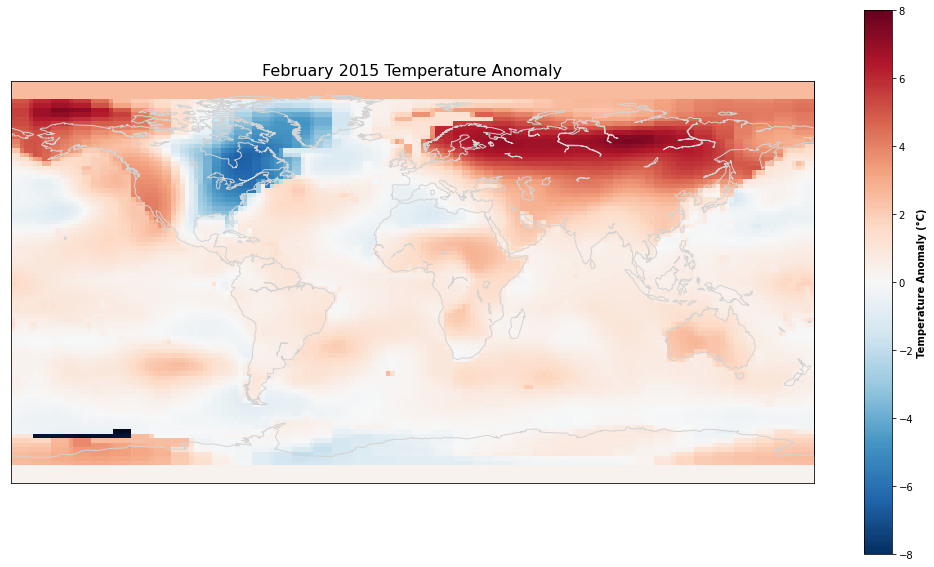

In [4]:
Global_Temperature_Anomalies_Analysis()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>